# DGCMIO (R) – Technical Assessment


In [1]:
import pandas as pd
import numpy as np
import json
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from pathlib import Path

os.chdir('/Users/chilow/Desktop/data_cleaning_project')

def read_all_gzipped_csv_in_folder(folder_path):
    """
    Reads all .csv.gz files in the given folder and returns a dictionary of DataFrames.
    """
    folder = Path(folder_path)
    dataframes = {}
    for file in folder.glob('*.csv.gz'):
        var_name = file.stem.replace('.csv', '')
        try:
            df = pd.read_csv(file, compression='gzip')
            dataframes[var_name] = df
            print(f"Loaded {file.name} into variable '{var_name}' (shape: {df.shape})")
        except Exception as e:
            print(f"Error reading {file}: {e}")
    return dataframes

# Read all files in ed folder
ed_dataframes = read_all_gzipped_csv_in_folder('data/raw/ed')

# Extract DataFrames from the dictionary
diagnosis_df = ed_dataframes['diagnosis']
edstays_df = ed_dataframes['edstays']
medrecon_df = ed_dataframes['medrecon']
pyxis_df = ed_dataframes['pyxis']
triage_df = ed_dataframes['triage']
vital_df = ed_dataframes['vitalsign']

Loaded diagnosis.csv.gz into variable 'diagnosis' (shape: (545, 6))
Loaded medrecon.csv.gz into variable 'medrecon' (shape: (2764, 9))
Loaded vitalsign.csv.gz into variable 'vitalsign' (shape: (1038, 11))
Loaded triage.csv.gz into variable 'triage' (shape: (222, 11))
Loaded edstays.csv.gz into variable 'edstays' (shape: (222, 9))
Loaded pyxis.csv.gz into variable 'pyxis' (shape: (1082, 7))


In [2]:
diagnosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subject_id   545 non-null    int64 
 1   stay_id      545 non-null    int64 
 2   seq_num      545 non-null    int64 
 3   icd_code     545 non-null    object
 4   icd_version  545 non-null    int64 
 5   icd_title    545 non-null    object
dtypes: int64(4), object(2)
memory usage: 25.7+ KB


In [3]:
edstays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject_id         222 non-null    int64  
 1   hadm_id            172 non-null    float64
 2   stay_id            222 non-null    int64  
 3   intime             222 non-null    object 
 4   outtime            222 non-null    object 
 5   gender             222 non-null    object 
 6   race               222 non-null    object 
 7   arrival_transport  222 non-null    object 
 8   disposition        222 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 15.7+ KB


In [4]:
medrecon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      2764 non-null   int64  
 1   stay_id         2764 non-null   int64  
 2   charttime       2764 non-null   object 
 3   name            2764 non-null   object 
 4   gsn             2764 non-null   int64  
 5   ndc             2764 non-null   int64  
 6   etc_rn          2764 non-null   int64  
 7   etccode         2760 non-null   float64
 8   etcdescription  2760 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 194.5+ KB


In [5]:
pyxis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  1082 non-null   int64  
 1   stay_id     1082 non-null   int64  
 2   charttime   1082 non-null   object 
 3   med_rn      1082 non-null   int64  
 4   name        1082 non-null   object 
 5   gsn_rn      1082 non-null   int64  
 6   gsn         1050 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 59.3+ KB


In [6]:
triage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      222 non-null    int64  
 1   stay_id         222 non-null    int64  
 2   temperature     196 non-null    float64
 3   heartrate       198 non-null    float64
 4   resprate        199 non-null    float64
 5   o2sat           198 non-null    float64
 6   sbp             199 non-null    float64
 7   dbp             199 non-null    float64
 8   pain            201 non-null    object 
 9   acuity          207 non-null    float64
 10  chiefcomplaint  222 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 19.2+ KB


In [7]:
vital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject_id   1038 non-null   int64  
 1   stay_id      1038 non-null   int64  
 2   charttime    1038 non-null   object 
 3   temperature  579 non-null    float64
 4   heartrate    1008 non-null   float64
 5   resprate     990 non-null    float64
 6   o2sat        971 non-null    float64
 7   sbp          998 non-null    float64
 8   dbp          998 non-null    float64
 9   rhythm       33 non-null     object 
 10  pain         736 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 89.3+ KB


## Part A – Data Quality & Normalisation 
A.1 Profile the vitals and medication files

In [8]:
# Generate descriptive statistics for vitalsign
vitalsign_profile = vital_df.describe()

# Generate descriptive statistics for medrecon
medrecon_profile = medrecon_df.describe()

# Create an Excel writer object and save to data/output folder
output_filename = 'data/output/A1_dataset_profiles.xlsx'
with pd.ExcelWriter(output_filename) as writer:
    vitalsign_profile.to_excel(writer, sheet_name='vitalsign_profile')
    medrecon_profile.to_excel(writer, sheet_name='medrecon_profile')

A.2 Detect & correct: unit errors (°F↔°C, mmHg↔kPa), physiologically impossible values, duplicate rows, null IDs.


In [9]:
vitalsign_profile

subject_id       stay_id  temperature    heartrate    resprate  \
count  1.038000e+03  1.038000e+03   579.000000  1008.000000  990.000000   
mean   1.001798e+07  3.527562e+07    94.303420    86.345238   18.152525   
std    1.194344e+04  2.981758e+06    15.420162    19.289924    3.502125   
min    1.000003e+07  3.009412e+07    31.400000    47.000000    8.000000   
25%    1.000905e+07  3.228780e+07    97.700000    72.000000   16.000000   
50%    1.001586e+07  3.522484e+07    98.100000    84.000000   18.000000   
75%    1.002324e+07  3.802079e+07    98.500000    98.000000   20.000000   
max    1.004002e+07  3.996872e+07   104.900000   179.000000   40.000000   

            o2sat         sbp         dbp  
count  971.000000  998.000000  998.000000  
mean    97.871267  126.943888   68.868737  
std      3.493279   23.666075   15.399846  
min     10.000000   11.000000   32.000000  
25%     97.000000  112.000000   58.000000  
50%     98.000000  125.000000   69.000000  
75%    100.000000  142.000000   79.000000  
max    100.000000  200.000000  184.000000

In [10]:
medrecon_profile

subject_id       stay_id           gsn           ndc       etc_rn  \
count  2.764000e+03  2.764000e+03   2764.000000  2.764000e+03  2764.000000   
mean   1.002030e+07  3.540653e+07  24573.158104  1.723847e+10     1.130608   
std    1.214181e+04  2.948347e+06  20861.364481  1.362414e+10     0.345516   
min    1.000003e+07  3.009412e+07      0.000000  0.000000e+00     1.000000   
25%    1.001435e+07  3.282297e+07   6373.000000  1.054401e+10     1.000000   
50%    1.001586e+07  3.535329e+07  18080.000000  1.093903e+10     1.000000   
75%    1.003563e+07  3.811255e+07  45772.000000  1.659006e+10     1.000000   
max    1.004002e+07  3.996872e+07  75886.000000  7.007405e+10     3.000000   

           etccode  
count  2760.000000  
mean   2693.040217  
std    2367.682095  
min       3.000000  
25%     530.000000  
50%    2530.000000  
75%    5808.500000  
max    6643.000000

## Assumption for physiological impossible values
### Temparature (https://en.wikipedia.org/wiki/Human_body_temperature)
* Hypothermian (<35)
* Normal (36.5 - 37.5)
* Fever (>37.5 - 41)

Any value >41 degree will threat as F and convert to Celcius

### Blood pressure (https://www.ncbi.nlm.nih.gov/books/NBK9633/table/A32/)
* Normal (SBP <120 and DBP <80)
* Prehypertension (120 - 139 or 80 - 89)
* Stage 1 (140 - 159 or 90 - 99)
* Stage 2 (>=160 or > 100)

### Heart Rate (https://www.healthline.com/health/dangerous-heart-rate#maximum-heart-rate)
* use the normal range from 75 - 220

### Respiraotry rate (https://emedicine.medscape.com/article/2172054-overview#a3)
* using the range (12 - 60) due to no age given

### Oxygen saturation (https://www.medicinenet.com/what_are_blood_oxygen_levels/article.htm)
* Using range between 60 - 100 %

### Chcking the distribution of the vital dataframe

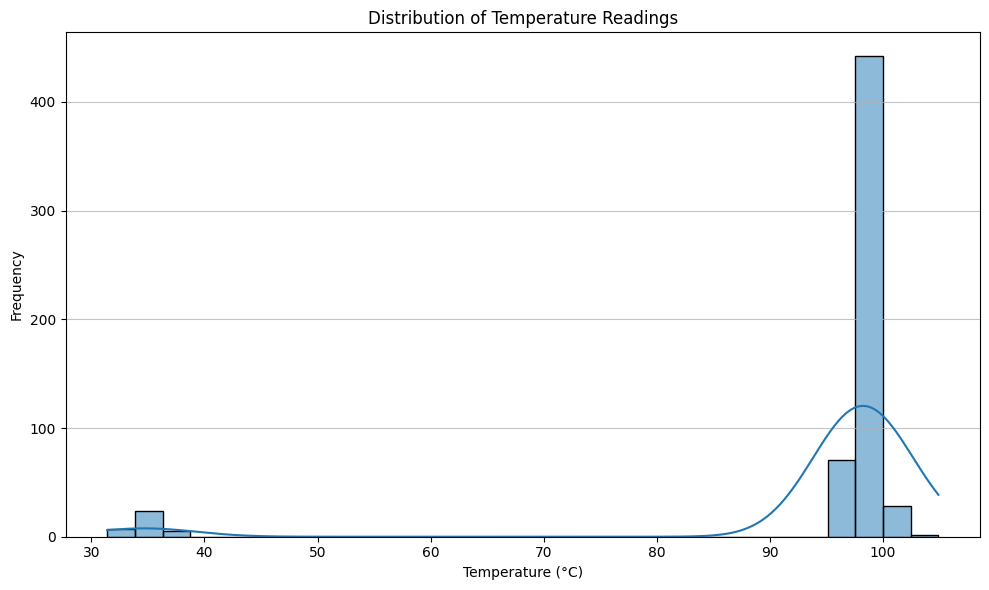

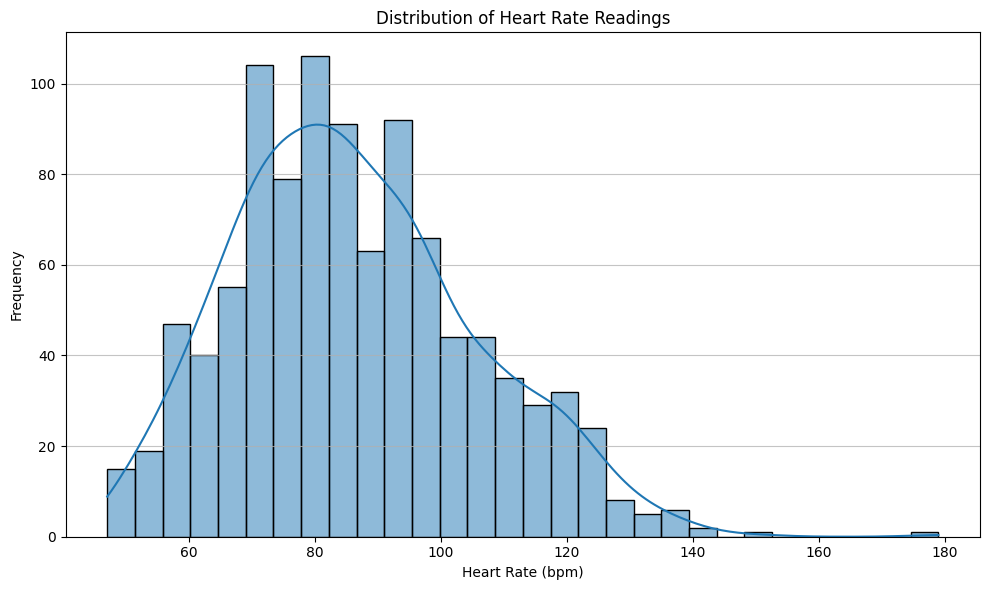

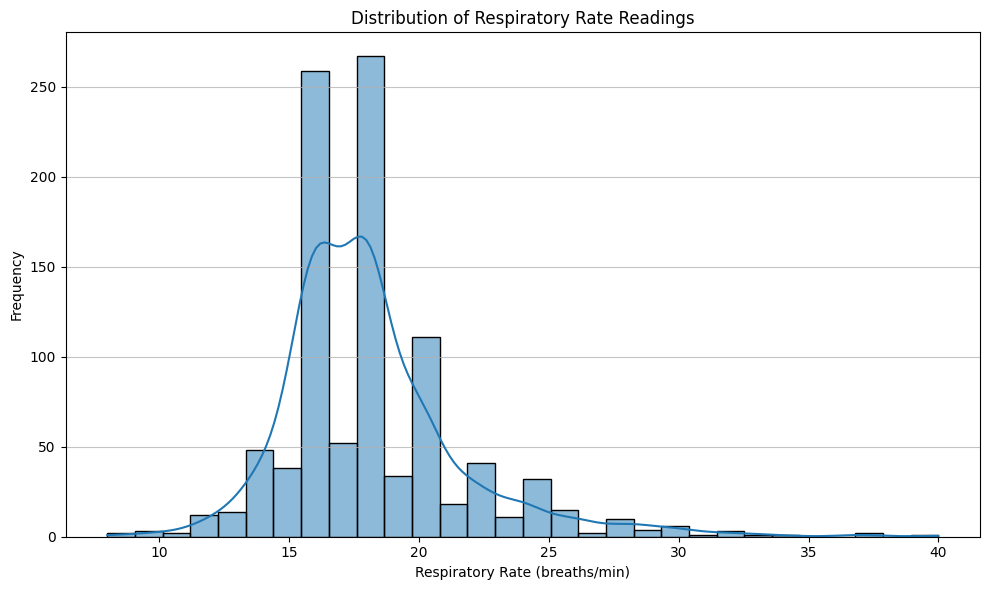

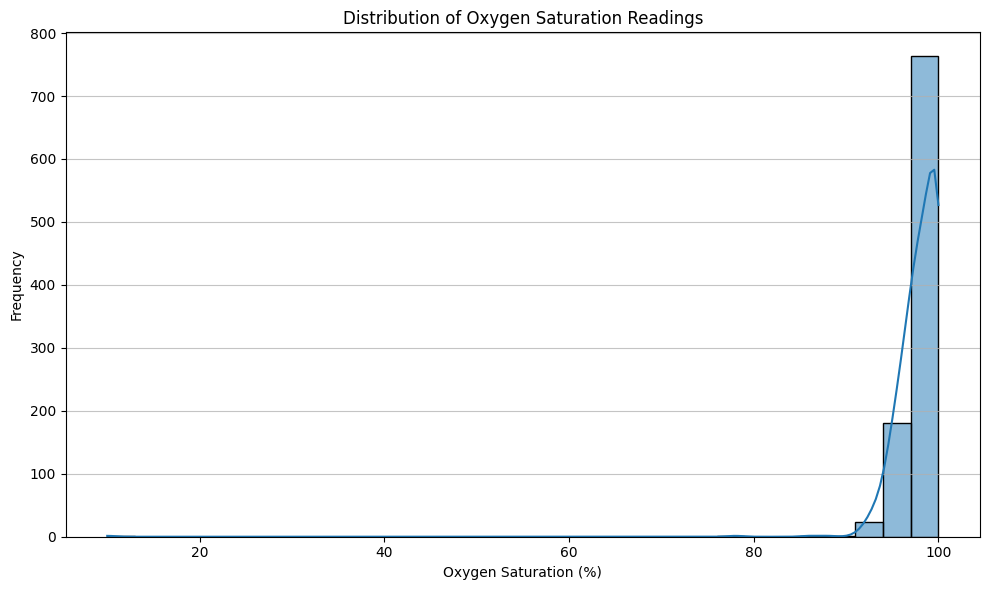

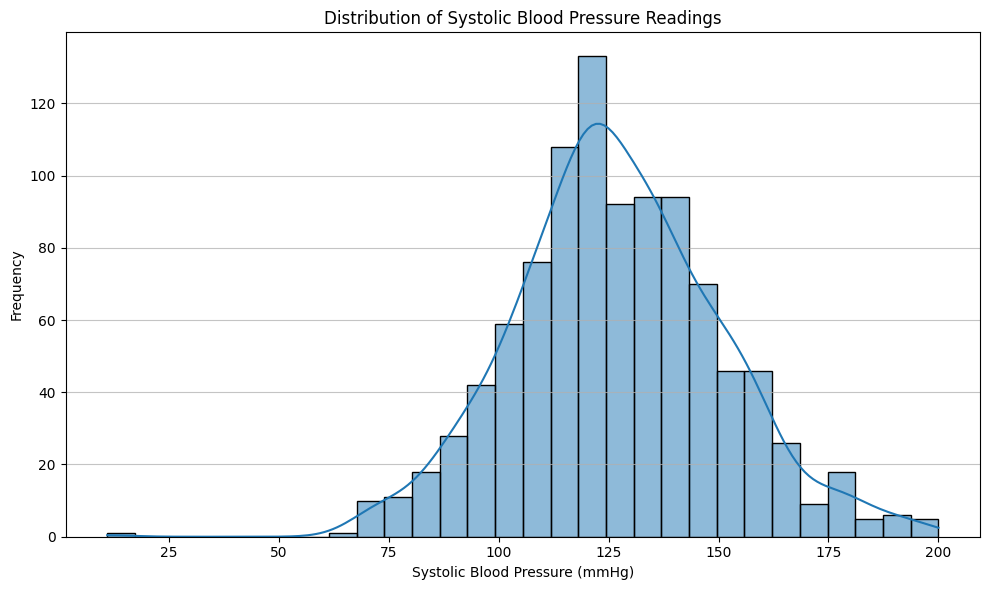

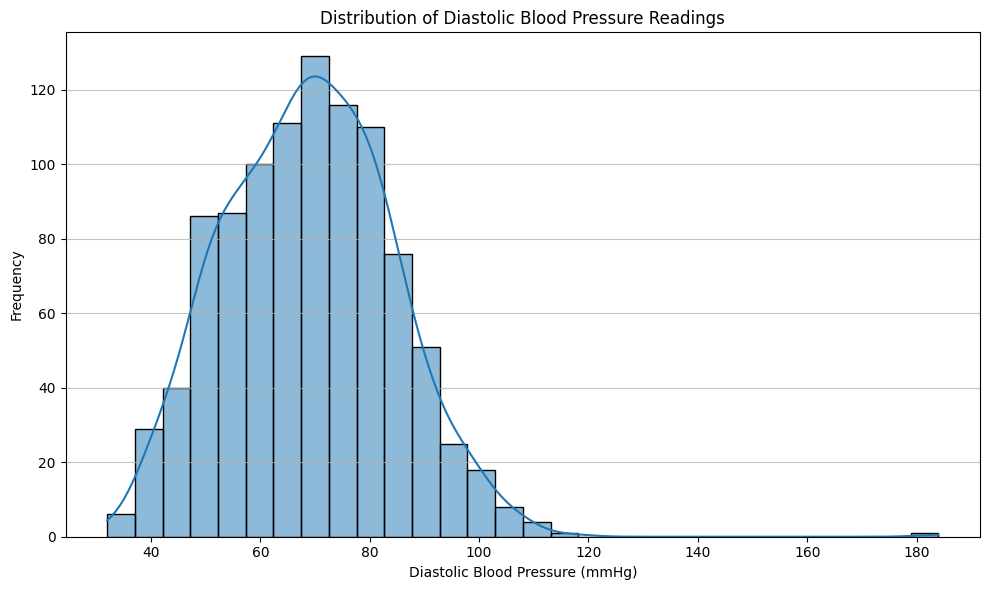

In [11]:
# List of vital signs to plot
vital_signs = ['temperature', 'heartrate', 'resprate', 'o2sat','sbp', 'dbp']
titles = {
    'temperature': 'Distribution of Temperature Readings',
    'heartrate': 'Distribution of Heart Rate Readings',
    'resprate': 'Distribution of Respiratory Rate Readings',
    'o2sat': 'Distribution of Oxygen Saturation Readings',
    'sbp': 'Distribution of Systolic Blood Pressure Readings',
    'dbp': 'Distribution of Diastolic Blood Pressure Readings'
}
x_labels = {
    'temperature': 'Temperature (°C)',
    'heartrate': 'Heart Rate (bpm)',
    'resprate': 'Respiratory Rate (breaths/min)',
    'o2sat': 'Oxygen Saturation (%)',
    'sbp': 'Systolic Blood Pressure (mmHg)',
    'dbp': 'Diastolic Blood Pressure (mmHg)'
}

# Generate and save histograms for each vital sign
for vital_sign in vital_signs:
    plt.figure(figsize=(10, 6))
    sns.histplot(vital_df[vital_sign].dropna(), kde=True, bins=30)
    plt.title(titles[vital_sign])
    plt.xlabel(x_labels[vital_sign])
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()

In [ ]:
def clean_vitals_physio(df):
    df = df.copy()
    # Temperature: °F to °C if values > 41°C (likely °F)
    if 'temperature' in df.columns:
        temp = df['temperature']
        fahrenheit_mask = temp > 41
        df.loc[fahrenheit_mask, 'temperature'] = (temp[fahrenheit_mask] - 32) * 5/9
        # Set impossible values (<35 or >41°C) to NaN
        df.loc[(df['temperature'] < 35) | (df['temperature'] > 41), 'temperature'] = np.nan
    # Blood pressure: mmHg to kPa if values > 250 (likely mmHg)
    for bp_col in ['systolic', 'diastolic']:
        if bp_col in df.columns:
            bp = df[bp_col]
            mmhg_mask = bp > 250
            df.loc[mmhg_mask, bp_col] = bp[mmhg_mask] * 0.133322
            # Set impossible values (<40 or >300 mmHg/kPa) to NaN
            df.loc[(df[bp_col] < 40) | (df[bp_col] > 300), bp_col] = np.nan
    # Heart rate: physiologically impossible values outside range of 75-22
    if 'heartrate' in df.columns:
        df.loc[(df['heartrate'] < 75) | (df['heartrate'] > 220), 'heartrate'] = np.nan
    # Respiratory rate: physiologically impossible values outside range of 12-60
    if 'respiratoryrate' in df.columns:
        df.loc[(df['respiratoryrate'] < 12) | (df['respiratoryrate'] > 60), 'respiratoryrate'] = np.nan
    # Oxygen saturation: physiologically impossible values outside range of 60-100
    if 'o2sat' in df.columns:
        df.loc[(df['o2sat'] < 60) | (df['o2sat'] > 100), 'o2sat'] = np.nan
    return df

# for cleaning null IDs and duplicates
def clean_generic_physio(df):
    df = df.drop_duplicates()
    id_col = None
    for possible_id in ['patient_id', 'id', 'subject_id', 'visit_id']:
        if possible_id in df.columns:
            id_col = possible_id
            break
    if id_col:
        df = df[df[id_col].notnull()]
    return df

# loop through each DataFrame and clean it
for name, df in ed_dataframes.items():
    if name == 'vitalsign':
        cleaned_df = clean_vitals_physio(df)
    else:
        cleaned_df = clean_generic_physio(df)
    # Save cleaned DataFrame to output folder with _cleaned suffix
    cleaned_path = f"data/output/{name}_cleaned.csv"
    cleaned_df.to_csv(cleaned_path, index=False)

In [13]:
# Load cleaned medication file
rxnconso_path = 'data/raw/medication_list/rxnorm_rxnconso.csv'
rxnsat_path = 'data/raw/medication_list/rxnorm_rxnsat.csv'

rxnconso_df = pd.read_csv(rxnconso_path)
rxnsat_df = pd.read_csv(rxnsat_path)


# Extract drug components
def extract_drug_components(description):
    # if description is empty
    if pd.isna(description):
        return {'name': '', 'dose': None, 'route': None, 'form': None}
    # convert to uppercase for consistency
    desc = str(description).upper()
    # Regular expressions to extract dose, route, and form
    dose_pattern = r'(\d+(?:\.\d+)?\s*(?:MG|ML|MCG|G|GRAM|%|UNIT|UNITS|IU|MEQ)(?:/\w+)?)'
    dose_matches = re.findall(dose_pattern, desc)
    
    # Join the matches into single string for route
    dose = ' / '.join(dose_matches) if dose_matches else None
    routes = ['ORAL', 'INTRAVENOUS', 'IV', 'IM', 'INTRAMUSCULAR', 'TOPICAL', 'INHALATION', 'SUBLINGUAL', 'RECTAL', 'NASAL', 'SUBCUTANEOUS', 'SC']
    route = next((r for r in routes if r in desc), None)
    
    # Join the matches into single string for form
    forms = ['TABLET', 'CAPSULE', 'INJECTION', 'CREAM', 'OINTMENT', 'SOLUTION', 'SUSPENSION', 'POWDER', 'SYRUP', 'PATCH', 'SPRAY', 'DROPS']
    form = next((f for f in forms if f in desc), None)
    
    # Get the drug name
    name_pattern = r'^([A-Za-z][A-Za-z\s]*?)(?:\s+\d|\s+\[|\s+\(|$)'
    name_match = re.match(name_pattern, description.strip())
    drug_name = name_match.group(1).strip() if name_match else description.split()[0] if description.split() else ''
    
    return {'name': drug_name, 'dose': dose, 'route': route, 'form': form}


# For RxNorm lookup
rxnorm_lookup = rxnconso_df[(rxnconso_df['sab'] == 'RXNORM') & (rxnconso_df['tty'].isin(['SCD', 'SBD', 'GPCK', 'BPCK', 'IN', 'PIN']))].copy()


# Map medications to RxNorm
mapping_results = []
for idx, row in medrecon_df.iterrows():
    subject_id = row.get('subject_id', '')
    charttime = row.get('charttime', '')
    drug_desc = str(row.get('name', '')).strip()
    
    # Handle NDC if present
    ndc = str(row.get('ndc', ''))
    # Skip if drug description is empty or invalid
    if not drug_desc or drug_desc.lower() in ['', 'nan', 'none']:
        continue
    
    rxnorm_id = None
    matched_desc = None
    
    # If NDC is present, try to map via rxnsat
    if ndc and ndc != '0' and not pd.isna(ndc):
        ndc_matches = rxnsat_df[(rxnsat_df['atn'].str.upper() == 'NDC') & (rxnsat_df['atv'].astype(str) == ndc)]
        if not ndc_matches.empty:
            rxcui = ndc_matches.iloc[0]['rxcui']
            rxnorm_row = rxnorm_lookup[rxnorm_lookup['rxcui'] == rxcui]
            if not rxnorm_row.empty:
                rxnorm_id = rxcui
                matched_desc = rxnorm_row.iloc[0]['str']
                
    # If no NDC match, try exact/partial string match
    if not rxnorm_id:
        exact_matches = rxnorm_lookup[rxnorm_lookup['str'].str.upper() == drug_desc.upper()]
        if not exact_matches.empty:
            rxnorm_id = exact_matches.iloc[0]['rxcui']
            matched_desc = exact_matches.iloc[0]['str']
        else:
            first_word = re.escape(drug_desc.split()[0])
            if len(first_word) > 2:
                partial_matches = rxnorm_lookup[rxnorm_lookup['str'].str.contains(first_word, case=False, na=False)]
                if not partial_matches.empty:
                    rxnorm_id = partial_matches.iloc[0]['rxcui']
                    matched_desc = partial_matches.iloc[0]['str']
    
    # Extract drug components
    extraction_desc = matched_desc if matched_desc else drug_desc
    drug_info = extract_drug_components(extraction_desc)
    mapping_results.append({
        'subject_id': subject_id,
        'charttime': charttime,
        'rxnorm_id': rxnorm_id,
        'drug_description': matched_desc if matched_desc else drug_desc,
        'drug_name': drug_info['name'],
        'dose': drug_info['dose'],
        'route': drug_info['route'],
        'form': drug_info['form']
    })


# Output tidy table
output_df = pd.DataFrame(mapping_results)
output_path = 'data/output/medication_rxnorm_mapping.csv'
output_df.to_csv(output_path, index=False)
output_df.head()

subject_id            charttime  rxnorm_id  \
0    10023117  2171-11-07 20:38:00        NaN   
1    10038999  2132-05-17 21:17:00        NaN   
2    10002428  2160-07-15 19:43:00        NaN   
3    10016742  2178-07-22 06:08:00        NaN   
4    10040025  2143-03-10 23:20:00   308191.0   

                  drug_description    drug_name    dose route     form  
0                         *acuvite     *acuvite    None  None     None  
1                     *depakote DR    *depakote    None  None     None  
2                  *nutrient drink    *nutrient    None  None     None  
3                     *iron liquid        *iron    None  None     None  
4  Amoxicillin 500 MG Oral Capsule  Amoxicillin  500 MG  ORAL  CAPSULE

# Part B – Clinical NLP / Entity Extraction (≈ 30 %)
## B.1 Extract the following as JSON lines, one visit (stay) per line:

Merge the traige with edstays to get admission date and duration
Key to merge using subject_id and stay_id

In [14]:
df_merge = pd.merge(triage_df, edstays_df, on=['subject_id', 'stay_id'], how='left')
df_merge['intime'] = pd.to_datetime(df_merge['intime'], errors='coerce')
df_merge['outtime'] = pd.to_datetime(df_merge['outtime'], errors='coerce')

df_merge['duration'] = (df_merge['outtime'] - df_merge['intime']).dt.total_seconds()

# Convert seconds to ISO 8601 duration format
def to_iso8601_duration(seconds):
    if pd.isna(seconds):
        return None
    seconds = int(seconds)
    if seconds < 0:
        return None

    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    days, hours = divmod(hours, 24)

    duration_parts = []
    if days > 0:
        duration_parts.append(f"{days}D")
    if hours > 0:
        duration_parts.append(f"{hours}H")
    if minutes > 0:
        duration_parts.append(f"{minutes}M")
    if seconds > 0:
        duration_parts.append(f"{seconds}S")

    if not duration_parts:
        return "PT0S" # If duration is 0, represent as PT0S
    return "P" + "".join(duration_parts)

df_merge['duration_iso8601'] = df_merge['duration'].apply(to_iso8601_duration)

In [15]:
# Group diagnoses by subject_id and stay_id
diagnoses_grouped = diagnosis_df.groupby(['subject_id', 'stay_id']).apply(
    lambda x: x[['icd_code', 'icd_title']].to_dict(orient='records')
).reset_index(name='diagnoses')

# using name from the medrecon and pyxis DataFrames
medications_medrecon_grouped = medrecon_df.groupby(['subject_id', 'stay_id']).apply(
    lambda x: x['name'].tolist()
).reset_index(name='home_medication_names_medrecon')

medications_pyxis_grouped = pyxis_df.groupby(['subject_id', 'stay_id']).apply(
    lambda x: x['name'].tolist()
).reset_index(name='home_medication_names_pyxis')


# Combine medication lists from medrecon and pyxis
all_medications_grouped = medications_medrecon_grouped
# Merge with pyxis, keeping both if they exist, then combine
all_medications_grouped = pd.merge(all_medications_grouped, medications_pyxis_grouped,
                                   on=['subject_id', 'stay_id'], how='outer')

def combine_med_lists(row):
    meds = []
    if isinstance(row['home_medication_names_medrecon'], list):
        meds.extend(row['home_medication_names_medrecon'])
    if isinstance(row['home_medication_names_pyxis'], list):
        meds.extend(row['home_medication_names_pyxis'])
    return list(set(meds)) # Use set to get unique medications

all_medications_grouped['home_medication'] = all_medications_grouped.apply(combine_med_lists, axis=1)
# Drop the intermediate columns
all_medications_grouped.drop(columns=['home_medication_names_medrecon', 'home_medication_names_pyxis'], inplace=True)


# Final merge for JSON output
df_final = pd.merge(df_merge, diagnoses_grouped, on=['subject_id', 'stay_id'], how='left')
df_final = pd.merge(df_final, all_medications_grouped, on=['subject_id', 'stay_id'], how='left')


# Select and format columns for JSON
json_output_list = []
for index, row in df_final.iterrows():
    entry = {
        "subject_id": row['subject_id'],
        "Admission_date": row['intime'].strftime('%Y-%m-%d %H:%M:%S') if pd.notna(row['intime']) else None,
        "Duration": row['duration_iso8601'],
        "Chief_complaint": row['chiefcomplaint'] if pd.notna(row['chiefcomplaint']) else None,
        "Diagnoses": row['diagnoses'] if isinstance(row['diagnoses'], list) else [],
        "Home_medication": row['home_medication'] if isinstance(row['home_medication'], list) else []
    }
    json_output_list.append(entry)

# Save JSON lines to a file
output_json_filename = 'data/output/B1_visit_data.jsonl'
with open(output_json_filename, 'w') as f:
    for entry in json_output_list:
        f.write(json.dumps(entry) + '\n')


/var/folders/0s/xtl3287x7n926d1p2gv3qzfh0000gn/T/ipykernel_96913/2261744216.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diagnoses_grouped = diagnosis_df.groupby(['subject_id', 'stay_id']).apply(
/var/folders/0s/xtl3287x7n926d1p2gv3qzfh0000gn/T/ipykernel_96913/2261744216.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medications_medrecon_grouped = medrecon_df.groupby(['subject_id', 'stay_id']).apply(
/var

## B.2 Post NLP analytics

In [16]:
# 1. What are the 3 most common complaints?
common_complaints = triage_df['chiefcomplaint'].dropna().str.lower().value_counts()
top_3_complaints = common_complaints.head(3)

top_3_complaints

chiefcomplaint
abd pain                 6
chest pain               5
altered mental status    4
Name: count, dtype: int64

In [17]:
# 2. What are the 3 most common ICD diagnoses?
common_diagnoses = diagnosis_df.groupby(['icd_code', 'icd_title']).size().reset_index(name='count')
common_diagnoses = common_diagnoses.sort_values(by='count', ascending=False)
top_3_diagnoses = common_diagnoses.head(3)

top_3_diagnoses

icd_code                           icd_title  count
31      4019                    HYPERTENSION NOS     21
283     Z794  Long term (current) use of insulin     19
166      I10    Essential (primary) hypertension     13

# Part C – Temporal Reasoning & Narrative

Merge arrival, vitals, first medication time, and disposition into a minute-resolution event log per visit.

### C.1 SpO₂ < 94 %, (mild) hypoxia for ≥ 5 min

In [18]:
# convert datetime columns to datetime objects
edstays_df['intime'] = pd.to_datetime(edstays_df['intime'], errors='coerce')
edstays_df['outtime'] = pd.to_datetime(edstays_df['outtime'], errors='coerce') 
vital_df['charttime'] = pd.to_datetime(vital_df['charttime'], errors='coerce')
medrecon_df['charttime'] = pd.to_datetime(medrecon_df['charttime'], errors='coerce')

# list to hold data for each stay
minute_data_list = []

# loop through each stay in edstays_df
for index, stay_row in edstays_df.iterrows():
    subject_id = stay_row['subject_id']
    stay_id = stay_row['stay_id']
    intime = stay_row['intime']
    outtime = stay_row['outtime']

    # Define the 6-hour window from admission
    end_time_window = intime + timedelta(hours=6)

    # Filter vitals for this stay and window
    stay_vitals = vital_df[(vital_df['subject_id'] == subject_id) &
                           (vital_df['stay_id'] == stay_id) &
                           (vital_df['charttime'] >= intime) &
                           (vital_df['charttime'] <= end_time_window)].copy()

    # Find first medication time for this stay
    stay_meds = medrecon_df[(medrecon_df['subject_id'] == subject_id) &
                            (medrecon_df['stay_id'] == stay_id)]

    first_med_time = stay_meds['charttime'].min() if not stay_meds.empty else None
    
    # Create minute index
    full_minute_idx = pd.date_range(start=intime, end=end_time_window, freq='min')
    
    # Reindex and forward-fill vital signs
    vitals_to_ffill = ['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']
    stay_vitals_resampled = stay_vitals.set_index('charttime')[vitals_to_ffill].reindex(full_minute_idx)
    stay_vitals_resampled = stay_vitals_resampled.ffill()

    # Add identifying columns
    stay_vitals_resampled['subject_id'] = subject_id
    stay_vitals_resampled['stay_id'] = stay_id
    stay_vitals_resampled['charttime'] = stay_vitals_resampled.index
    stay_vitals_resampled['time_from_intime_minutes'] = (stay_vitals_resampled.index - intime).total_seconds() / 6
    stay_vitals_resampled['first_med_time'] = first_med_time
    stay_vitals_resampled['disposition_time'] = outtime

    # Identify C.1 SpO₂ < 94 % (mild) hypoxia for ≥ 5 min
    stay_vitals_resampled['is_hypoxia'] = stay_vitals_resampled['o2sat'] < 94
    stay_vitals_resampled['hypoxia_roll_sum'] = stay_vitals_resampled['is_hypoxia'].rolling(window=5, min_periods=5).sum()
    stay_vitals_resampled['hypoxia_episode'] = stay_vitals_resampled['hypoxia_roll_sum'] >= 5

    minute_data_list.append(stay_vitals_resampled)


# Combine all stays
if minute_data_list:
    df_minute_events = pd.concat(minute_data_list).reset_index(drop=True)
else:
    df_minute_events = pd.DataFrame()
    
df_minute_events


/var/folders/0s/xtl3287x7n926d1p2gv3qzfh0000gn/T/ipykernel_96913/1395643253.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_minute_events = pd.concat(minute_data_list).reset_index(drop=True)


temperature  heartrate  resprate  o2sat  sbp  dbp  subject_id  \
0              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
1              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
2              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
3              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
4              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
...            ...        ...       ...    ...  ...  ...         ...   
80137          NaN        NaN       NaN    NaN  NaN  NaN    10025463   
80138          NaN        NaN       NaN    NaN  NaN  NaN    10025463   
80139          NaN        NaN       NaN    NaN  NaN  NaN    10025463   
80140          NaN        NaN       NaN    NaN  NaN  NaN    10025463   
80141          NaN        NaN       NaN    NaN  NaN  NaN    10025463   

        stay_id           charttime  time_from_intime_minutes  \
0      37887480 2125-03-19 12:36:00                       0.0   
1      37887480 2125-03-19 12:37:00                      10.0   
2      37887480 2125-03-19 12:38:00                      20.0   
3      37887480 2125-03-19 12:39:00                      30.0   
4      37887480 2125-03-19 12:40:00                      40.0   
...         ...                 ...                       ...   
80137  35470228 2137-10-09 00:12:00                    3560.0   
80138  35470228 2137-10-09 00:13:00                    3570.0   
80139  35470228 2137-10-09 00:14:00                    3580.0   
80140  35470228 2137-10-09 00:15:00                    3590.0   
80141  35470228 2137-10-09 00:16:00                    3600.0   

           first_med_time    disposition_time  is_hypoxia  hypoxia_roll_sum  \
0     2125-03-19 13:17:00 2125-03-19 16:59:47       False               NaN   
1     2125-03-19 13:17:00 2125-03-19 16:59:47       False               NaN   
2     2125-03-19 13:17:00 2125-03-19 16:59:47       False               NaN   
3     2125-03-19 13:17:00 2125-03-19 16:59:47       False               NaN   
4     2125-03-19 13:17:00 2125-03-19 16:59:47       False               0.0   
...                   ...                 ...         ...               ...   
80137                 NaT 2137-10-08 21:20:50       False               0.0   
80138                 NaT 2137-10-08 21:20:50       False               0.0   
80139                 NaT 2137-10-08 21:20:50       False               0.0   
80140                 NaT 2137-10-08 21:20:50       False               0.0   
80141                 NaT 2137-10-08 21:20:50       False               0.0   

       hypoxia_episode  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
80137            False  
80138            False  
80139            False  
80140            False  
80141            False  

[80142 rows x 15 columns]

### C.2 SBP < 90 mmHg, hypotension for ≥ 5 min

In [19]:
df_minute_events['is_hypotension'] = df_minute_events['sbp'] < 90
df_minute_events['hypotension_roll_sum'] = df_minute_events['is_hypotension'].rolling(window=5, min_periods=5).sum()
df_minute_events['hypotension_episode'] = df_minute_events['hypotension_roll_sum'] >= 5

df_minute_events

temperature  heartrate  resprate  o2sat  sbp  dbp  subject_id  \
0              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
1              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
2              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
3              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
4              NaN        NaN       NaN    NaN  NaN  NaN    10014729   
...            ...        ...       ...    ...  ...  ...         ...   
80137          NaN        NaN       NaN    NaN  NaN  NaN    10025463   
80138          NaN        NaN       NaN    NaN  NaN  NaN    10025463   
80139          NaN        NaN       NaN    NaN  NaN  NaN    10025463   
80140          NaN        NaN       NaN    NaN  NaN  NaN    10025463   
80141          NaN        NaN       NaN    NaN  NaN  NaN    10025463   

        stay_id           charttime  time_from_intime_minutes  \
0      37887480 2125-03-19 12:36:00                       0.0   
1      37887480 2125-03-19 12:37:00                      10.0   
2      37887480 2125-03-19 12:38:00                      20.0   
3      37887480 2125-03-19 12:39:00                      30.0   
4      37887480 2125-03-19 12:40:00                      40.0   
...         ...                 ...                       ...   
80137  35470228 2137-10-09 00:12:00                    3560.0   
80138  35470228 2137-10-09 00:13:00                    3570.0   
80139  35470228 2137-10-09 00:14:00                    3580.0   
80140  35470228 2137-10-09 00:15:00                    3590.0   
80141  35470228 2137-10-09 00:16:00                    3600.0   

           first_med_time    disposition_time  is_hypoxia  hypoxia_roll_sum  \
0     2125-03-19 13:17:00 2125-03-19 16:59:47       False               NaN   
1     2125-03-19 13:17:00 2125-03-19 16:59:47       False               NaN   
2     2125-03-19 13:17:00 2125-03-19 16:59:47       False               NaN   
3     2125-03-19 13:17:00 2125-03-19 16:59:47       False               NaN   
4     2125-03-19 13:17:00 2125-03-19 16:59:47       False               0.0   
...                   ...                 ...         ...               ...   
80137                 NaT 2137-10-08 21:20:50       False               0.0   
80138                 NaT 2137-10-08 21:20:50       False               0.0   
80139                 NaT 2137-10-08 21:20:50       False               0.0   
80140                 NaT 2137-10-08 21:20:50       False               0.0   
80141                 NaT 2137-10-08 21:20:50       False               0.0   

       hypoxia_episode  is_hypotension  hypotension_roll_sum  \
0                False           False                   NaN   
1                False           False                   NaN   
2                False           False                   NaN   
3                False           False                   NaN   
4                False           False                   0.0   
...                ...             ...                   ...   
80137            False           False                   0.0   
80138            False           False                   0.0   
80139            False           False                   0.0   
80140            False           False                   0.0   
80141            False           False                   0.0   

       hypotension_episode  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  
...                    ...  
80137                False  
80138                False  
80139                False  
80140                False  
80141                False  

[80142 rows x 18 columns]

### C.3 For patients experiencing episodes above, draw a heat-map (first 6 h, bin = 10 min) showing % of visits experiencing either episode

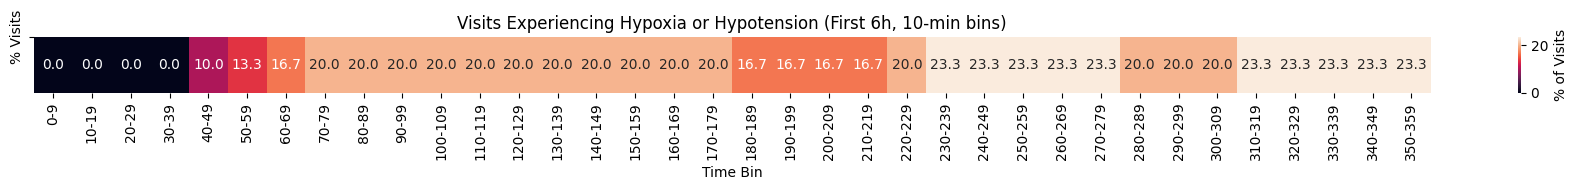

<Figure size 640x480 with 0 Axes>

In [ ]:
df_minute_events['any_episode'] = df_minute_events['hypoxia_episode'] | df_minute_events['hypotension_episode']
visits_with_episodes = df_minute_events[df_minute_events['any_episode']].stay_id.unique()

if len(visits_with_episodes) == 0:
    print("No visits with hypoxia or hypotension episodes detected.")
else:
    # Filter to affected visits
    df_episodes = df_minute_events[df_minute_events['stay_id'].isin(visits_with_episodes)].copy()
    # Bin time into 10-min intervals
    bins = np.arange(0, 361, 10)
    labels = [f'{i}-{i+9}' for i in bins[:-1]]
    df_episodes['time_bin'] = pd.cut(df_episodes['time_from_intime_minutes'], bins=bins, right=False, labels=labels)
    
    heatmap_data = pd.DataFrame(index=labels, columns=['Percentage'])
    total_visits = len(visits_with_episodes)
    # Calculate percentage of visits in each bin
    for bin_label in labels:
        stays_in_bin = df_episodes[(df_episodes['time_bin'] == bin_label) & (df_episodes['any_episode'])]['stay_id'].nunique()
        percentage = (stays_in_bin / total_visits) * 100 if total_visits > 0 else 0
        heatmap_data.loc[bin_label, 'Percentage'] = percentage
    heatmap_data['Percentage'] = pd.to_numeric(heatmap_data['Percentage'])
    
    # Plot heatmap
    plt.figure(figsize=(18, 2))
    sns.heatmap([heatmap_data['Percentage'].values], annot=True, fmt='.1f', cbar_kws={'label': '% of Visits'})
    plt.title('Visits Experiencing Hypoxia or Hypotension (First 6h, 10-min bins)')
    plt.xlabel('Time Bin')
    plt.yticks([0], ['% Visits'])
    plt.xticks(np.arange(len(labels))+0.5, labels, rotation=90)
    plt.tight_layout()
    plt.show()
    plt.savefig('data/output/C3_hypoxia_hypotension_heatmap.png', bbox_inches='tight')